In [1]:
from pylab import *
%matplotlib inline

In [10]:
caffe_root = '../'  # this file should be run from {caffe_root}/examples (otherwise change this line)

import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

In [11]:
import os
os.chdir(caffe_root)

In [12]:
caffe.set_device(0)
caffe.set_mode_gpu()

In [15]:
%pwd

u'/home/hongwen.zhang/caffe-faceheatmap-68points'

In [16]:
%cd /home/hongwen.zhang/caffe-faceheatmap-68points/python

/home/hongwen.zhang/caffe-faceheatmap-68points/python


In [17]:
net = caffe.Net('../models/face68map/matlab.prototxt','../data/face68map/snapshots/face68map_train_iter_60000.caffemodel', caffe.TEST)

ImportError: No module named Image

ERROR:root:Line magic function `%which` not found.


/usr/bin/python


In [18]:
sys.path

['../python',
 '../python',
 '',
 '/usr/lib64/python27.zip',
 '/usr/lib64/python2.7',
 '/usr/lib64/python2.7/plat-linux2',
 '/usr/lib64/python2.7/lib-tk',
 '/usr/lib64/python2.7/lib-old',
 '/usr/lib64/python2.7/lib-dynload',
 '/usr/lib64/python2.7/site-packages',
 '/usr/lib64/python2.7/site-packages/gtk-2.0',
 '/usr/lib/python2.7/site-packages',
 '/usr/lib/python2.7/site-packages/bob-2.3.4-py2.7.egg',
 '/usr/lib/python2.7/site-packages/IPython/extensions',
 '/home/hongwen.zhang/.ipython']

ImportError: No module named Image

NameError: name 'Image' is not defined

ImportError: No module named Numpy

In [19]:
from PIL import Image

In [20]:
jpgfile = Image.open("../matlab/pose/sample_images/3030012395_1.jpg")

In [21]:
import numpy as np
import matplotlib.pyplot as plt

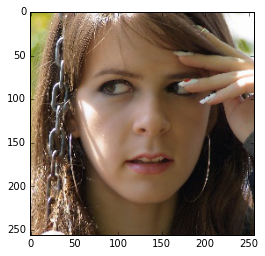

In [22]:
plt.imshow(jpgfile)

In [31]:
arr = np.array(jpgfile)

In [40]:
caffe.io.array_to_blobproto(arr).shape

dim: 256
dim: 256
dim: 3

In [45]:
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

In [47]:
transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension

In [48]:
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]

In [49]:
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

In [50]:
net.blobs['data'].data[...] = transformer.preprocess('data', caffe.io.load_image('../matlab/pose/sample_images/3030012395_1.jpg'))

In [52]:
output = net.forward()

In [74]:
output['conv8'][0][0]

array([[  1.79992989e-04,   1.21031888e-04,  -1.25104096e-04, ...,
         -1.64010562e-05,   2.70170625e-04,   1.81312906e-04],
       [  2.32752645e-04,   1.87377213e-04,   2.67219730e-05, ...,
          2.48784898e-04,   3.79588921e-04,   3.73044284e-04],
       [  2.65675364e-04,   7.03493133e-05,   8.08150508e-05, ...,
          3.16398218e-05,   2.22827075e-04,   1.59218442e-04],
       ..., 
       [  4.52795299e-04,   5.67426207e-04,   7.15817092e-04, ...,
          4.61750664e-04,   3.77596589e-04,   4.67777951e-04],
       [  4.57316637e-05,   1.73987821e-04,   4.36389586e-04, ...,
          4.75955429e-04,   4.27169958e-04,   4.89119207e-04],
       [  2.56947475e-04,   1.23433303e-04,   2.72225356e-04, ...,
          4.55027912e-04,   4.42728633e-04,   4.64181183e-04]], dtype=float32)

(array([  2.66861000e+05,   5.65700000e+03,   2.16600000e+03,
          1.33000000e+03,   8.72000000e+02,   7.08000000e+02,
          5.41000000e+02,   2.87000000e+02,   8.80000000e+01,
          1.80000000e+01]),
 array([-0.07465813,  0.05007264,  0.1748034 ,  0.29953416,  0.42426493,
         0.54899569,  0.67372645,  0.79845721,  0.92318798,  1.04791874,
         1.1726495 ]),
 <a list of 10 Patch objects>)

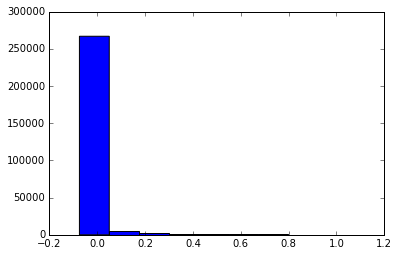

In [82]:
plt.hist(output['conv8'][0].flatten())

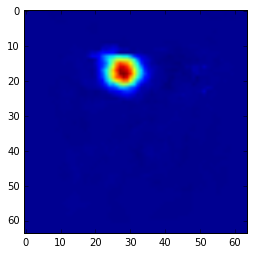

In [70]:
plt.imshow(output['conv8'][0][20])